Matplotlib is building the font cache; this may take a moment.


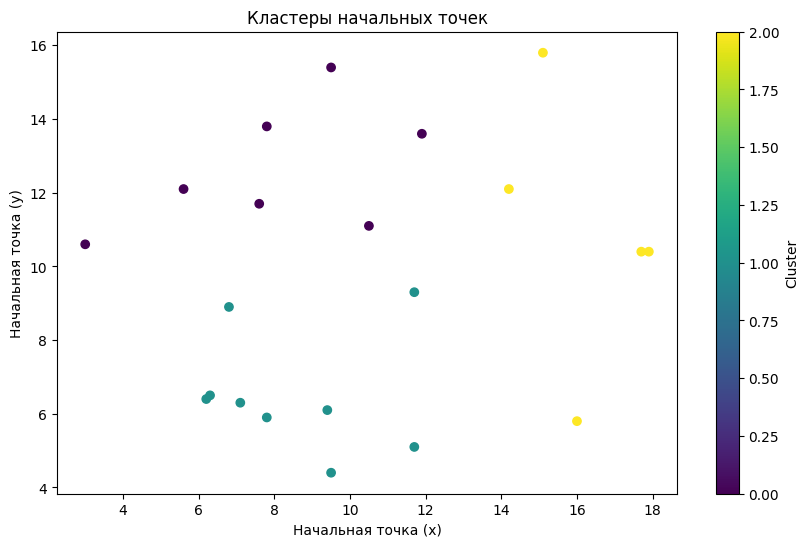

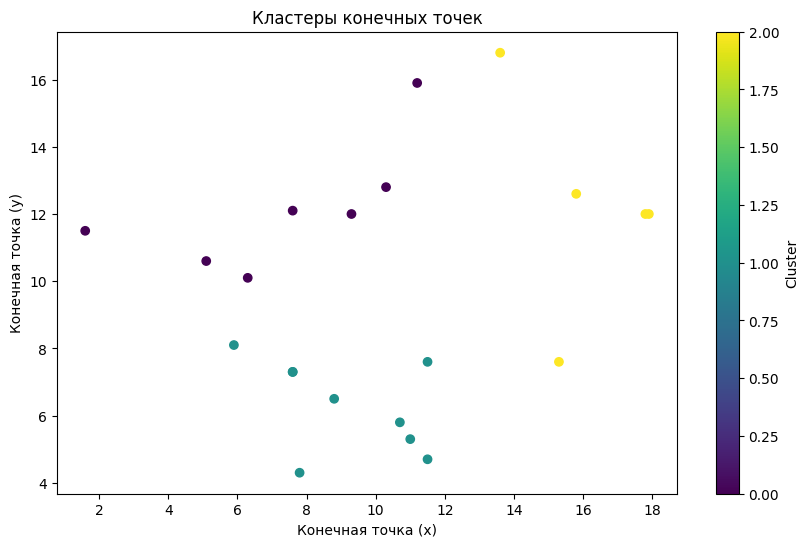

    Начальная точка (x)  Начальная точка (y)  Конечная точка (x)  \
0                   9.5                 15.4                11.2   
1                  17.7                 10.4                17.8   
2                  15.1                 15.8                13.6   
3                  17.9                 10.4                17.9   
4                  14.2                 12.1                15.8   
5                  11.9                 13.6                10.3   
6                   7.8                 13.8                 7.6   
7                  10.5                 11.1                 9.3   
8                   3.0                 10.6                 1.6   
9                   6.2                  6.4                 7.6   
10                  7.8                  5.9                 7.8   
11                  9.5                  4.4                11.0   
12                 11.7                  5.1                11.5   
13                  9.4                  6.1    

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ввод данных
data = {
    'Начальная точка (x)': [9.5, 17.7, 15.1, 17.9, 14.2, 11.9, 7.8, 10.5, 3.0, 6.2, 7.8, 9.5, 11.7, 9.4, 6.3, 6.8, 5.6, 7.1, 7.6, 16.0, 11.7],
    'Начальная точка (y)': [15.4, 10.4, 15.8, 10.4, 12.1, 13.6, 13.8, 11.1, 10.6, 6.4, 5.9, 4.4, 5.1, 6.1, 6.5, 8.9, 12.1, 6.3, 11.7, 5.8, 9.3],
    'Конечная точка (x)': [11.2, 17.8, 13.6, 17.9, 15.8, 10.3, 7.6, 9.3, 1.6, 7.6, 7.8, 11.0, 11.5, 10.7, 7.6, 5.9, 5.1, 8.8, 6.3, 15.3, 11.5],
    'Конечная точка (y)': [15.9, 12.0, 16.8, 12.0, 12.6, 12.8, 12.1, 12.0, 11.5, 7.3, 4.3, 5.3, 4.7, 5.8, 7.3, 8.1, 10.6, 6.5, 10.1, 7.6, 7.6],
    'Расстояние в нм': [1.74, 1.53, 1.82, 1.56, 1.69, 1.83, 1.78, 1.57, 1.65, 1.71, 1.58, 1.75, 0.47, 1.37, 1.57, 1.26, 1.59, 1.71, 2.03, 1.97, 1.71]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Масштабирование данных
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Кластеризация K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Добавление меток кластеров в DataFrame
df['Cluster'] = kmeans.labels_

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(df['Начальная точка (x)'], df['Начальная точка (y)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Начальная точка (x)')
plt.ylabel('Начальная точка (y)')
plt.title('Кластеры начальных точек')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Конечная точка (x)'], df['Конечная точка (y)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Конечная точка (x)')
plt.ylabel('Конечная точка (y)')
plt.title('Кластеры конечных точек')
plt.colorbar(label='Cluster')
plt.show()

# Отображение DataFrame с метками кластеров
print(df)
